In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 56.6 MB/s eta 0:00:00


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
pd.set_option('display.max_columns', 50)

import gensim
from gensim import models
import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import nltk, string,re
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import LdaMulticore

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel

from pathlib import Path
import os

In [ ]:
#Downgraded my numpy version to reduce the errors from LDAMulticore.
np.version.version

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'1.22.4'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
#Loading the pickled car dataframe
HOME_DIR = Path("drive/MyDrive/Recys-Project/New-data")
car_df = pd.read_parquet(HOME_DIR / "all_files_cleaned.parquet")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Topic Modeling with NMF with sklearn

In [ ]:
#Vectorizing the pre-processed documents using Count Vec and TF-IDF Vect
vectorizer = TfidfVectorizer()
# cv = CountVectorizer()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Using Countvect
# t0 = time()
# count = cv.fit_transform(car_df.review).toarray()
# print("done in %0.3fs." % (time() - t0))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# count

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# count.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(car_df['review'])
print("done in %0.3fs." % (time() - t0))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracting tf-idf features for NMF...
done in 2.132s.


In [ ]:
tfidf.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(42839, 19848)

In [ ]:
tfidf_df = pd.DataFrame(tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tfidf_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aa  aaa  aamco  aaron  aarp  aawd   ab  aback  abandon  abandoned  \
0  0.0  0.0    0.0    0.0   0.0   0.0  0.0    0.0      0.0        0.0   
1  0.0  0.0    0.0    0.0   0.0   0.0  0.0    0.0      0.0        0.0   
2  0.0  0.0    0.0    0.0   0.0   0.0  0.0    0.0      0.0        0.0   
3  0.0  0.0    0.0    0.0   0.0   0.0  0.0    0.0      0.0        0.0   
4  0.0  0.0    0.0    0.0   0.0   0.0  0.0    0.0      0.0        0.0   

   abandoning  abarth  abarths  abc  abd  abet  abhor  abhorrent  abilene  \
0         0.0     0.0      0.0  0.0  0.0   0.0    0.0        0.0      0.0   
1         0.0     0.0      0.0  0.0  0.0   0.0    0.0        0.0      0.0   
2         0.0     0.0      0.0  0.0  0.0   0.0    0.0        0.0      0.0   
3         0.0     0.0      0.0  0.0  0.0   0.0    0.0        0.0      0.0   
4         0.0     0.0      0.0  0.0  0.0   0.0    0.0        0.0      0.0   

   ability  abit  able  abnormal  abnormally  aboard  ...  zillion  zip  \
0      0.0   0.0   0.0       0.0         0.0     0.0  ...      0.0  0.0   
1      0.0   0.0   0.0       0.0         0.0     0.0  ...      0.0  0.0   
2      0.0   0.0   0.0       0.0         0.0     0.0  ...      0.0  0.0   
3      0.0   0.0   0.0       0.0         0.0     0.0  ...      0.0  0.0   
4      0.0   0.0   0.0       0.0         0.0     0.0  ...      0.0  0.0   

   zipped  zipper  zippier  zippiness  zipping  zippy   zj   zl   zo  zombie  \
0     0.0     0.0      0.0        0.0      0.0    0.0  0.0  0.0  0.0     0.0   
1     0.0     0.0      0.0        0.0      0.0    0.0  0.0  0.0  0.0     0.0   
2     0.0     0.0      0.0        0.0      0.0    0.0  0.0  0.0  0.0     0.0   
3     0.0     0.0      0.0        0.0      0.0    0.0  0.0  0.0  0.0     0.0   
4     0.0     0.0      0.0        0.0      0.0    0.0  0.0  0.0  0.0     0.0   

   zone  zoo  zoom  zoomed  zooming  zoomy  zoomzoom   zr   zs  zurich   zx  \
0   0.0  0.0   0.0     0.0      0.0    0.0       0.0  0.0  0.0     0.0  0.0   
1   0.0  0.0   0.0     0.0      0.0    0.0       0.0  0.0  0.0     0.0  0.0   
2   0.0  0.0   0.0     0.0      0.0    0.0       0.0  0.0  0.0     0.0  0.0   
3   0.0  0.0   0.0     0.0      0.0    0.0       0.0  0.0  0.0     0.0  0.0   
4   0.0  0.0   0.0     0.0      0.0    0.0       0.0  0.0  0.0     0.0  0.0   

   zxs   zz  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 19848 columns]

In [ ]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features")
t0 = time()
model = NMF(n_components=10, random_state=1,
          alpha_W=.1, l1_ratio=.5)
nmf = model.fit_transform(tfidf)
print("done in %0.3fs." % (time() - t0))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting the NMF model with tf-idf features
done in 2.000s.


In [ ]:
W = nmf
H = model.components_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The W factor contains the document membership weights relative to each of the k topics. Each row corresponds to a single document, and each column correspond to a topic.


The H factor contains the term weights relative to each of the k topics. In this case, each row corresponds to a topic, and each column corresponds to a unique term in the corpus vocabulary.



In [ ]:
# Helper functions for grabbing the topics
def get_descriptor(terms, H, topic_index, top):
    #reverse sort the values to sort the indices
    top_indices = np.argsort(H[topic_index,:])[::-1]
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(terms[term_index])
    return top_terms
    
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
def get_top_cars(df,W,topic_index,number):
    #getting reversed order of cars
    top_indices = np.argsort(W[:,topic_index])[::-1]
    
    top_cars = []
    for caridx in top_indices[0:number]:
        top_cars.append(df.iloc[caridx])
    return top_cars

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print_top_words(model,tfidf_vectorizer.get_feature_names_out(),5)

Topic #0:
zz flappy flaming flange flanked
Topic #1:
zz flappy flaming flange flanked
Topic #2:
zz flappy flaming flange flanked
Topic #3:
zz flappy flaming flange flanked
Topic #4:
zz flappy flaming flange flanked
Topic #5:
zz flappy flaming flange flanked
Topic #6:
zz flappy flaming flange flanked
Topic #7:
zz flappy flaming flange flanked
Topic #8:
zz flappy flaming flange flanked
Topic #9:
zz flappy flaming flange flanked



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
get_top_cars(car_df,W,0,5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Review_Date                                  2015-10-22 17:04:00
 vehicle                                  Volkswagen Tiguan SUV S
 review         tiguan reasonable get pay average around super...
 rating                                                       4.0
 year                                                        2016
 user_id                                                    15269
 DESC                                4dr SUV (2.0L 4cyl Turbo 6A)
 text_length                                                   65
 Name: 42838, dtype: object,
 Review_Date                                  2017-08-24 09:36:00
 vehicle                                     Mazda CX-5 SUV Grand
 review         passenger handle navigation sytem husband driv...
 rating                                                       5.0
 year                                                        2017
 user_id                                                     6231
 DESC                               Select 4dr 

## Content based filtering


Because of memory requirement of computing the cosine similarity of the entire dataset, we'll use just a fraction of the whole dataset

In [ ]:
num = 0.4 *len(car_df)
car_df2 = car_df.iloc[:int(num)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
car_df2.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(17135, 8)

In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
t0 = time()
tfidf2 = tfidf_vectorizer.fit_transform(car_df2['review'])
print("done in %0.3fs." % (time() - t0))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracting tf-idf features for NMF...
done in 0.921s.


In [ ]:
tfidf2.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(17135, 13537)

In [ ]:
# importing linear_kernel to compute dot product 
from sklearn.metrics.pairwise import linear_kernel  

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# computing cosine similarity using linear_kernel instead of cosine similarity itself
# because it computational expensive to compute and since the magnitude of the 
# TF-IDF for each car review always sum to one, so we can use linear kernel instead
cosine_sim = linear_kernel(tfidf2, tfidf2) 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
car_df2.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                  vehicle  \
0 2017-01-18 07:15:00   Dodge Avenger Sedan SE   
1 2016-11-08 09:39:00   Dodge Avenger Sedan SE   
2 2014-10-09 10:57:00  Dodge Avenger Sedan R/T   
3 2018-08-15 09:57:00   Dodge Avenger Sedan SE   
4 2016-12-19 08:57:00  Dodge Avenger Sedan R/T   

                                              review  rating  year  user_id  \
0  bought dodge avenger brand new shop regular le...     1.0  2014    20686   
1  se model recently purchased car love sporty lo...     4.0  2014      499   
2  traded dodge dart turbo manual avenger pentast...     5.0  2014    27852   
3  bought car sister left auto loan longer needed...     2.0  2012    10419   
4  bought car brand new shop time fixed heater co...     3.0  2012    11484   

                       DESC  text_length  
0  4dr Sedan (2.4L 4cyl 4A)           61  
1  4dr Sedan (2.4L 4cyl 4A)           31  
2  4dr Sedan (3.6L 6cyl 6A)           63  
3  4dr Sedan (2.4L 4cyl 4A)          200  
4  4dr Sedan (3.6L 6cyl 6A)          138

In [ ]:
df = pd.DataFrame()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df["vehicle"] = car_df2['vehicle'] +" "+ car_df2["year"].astype(str) +" "+ car_df2["DESC"]
df["review"] = car_df2["review"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


vehicle  \
0  Dodge Avenger Sedan SE 2014 4dr Sedan (2.4L 4c...   
1  Dodge Avenger Sedan SE 2014 4dr Sedan (2.4L 4c...   
2  Dodge Avenger Sedan R/T 2014 4dr Sedan (3.6L 6...   
3  Dodge Avenger Sedan SE 2012 4dr Sedan (2.4L 4c...   
4  Dodge Avenger Sedan R/T 2012 4dr Sedan (3.6L 6...   

                                              review  
0  bought dodge avenger brand new shop regular le...  
1  se model recently purchased car love sporty lo...  
2  traded dodge dart turbo manual avenger pentast...  
3  bought car sister left auto loan longer needed...  
4  bought car brand new shop time fixed heater co...

In [ ]:
cosine_sim

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.        , 0.0188786 , 0.16943093, ..., 0.01711504, 0.08257894,
        0.06094709],
       [0.0188786 , 1.        , 0.03373456, ..., 0.02539826, 0.03233452,
        0.0633885 ],
       [0.16943093, 0.03373456, 1.        , ..., 0.03404735, 0.03801512,
        0.03891059],
       ...,
       [0.01711504, 0.02539826, 0.03404735, ..., 1.        , 0.01155337,
        0.03054754],
       [0.08257894, 0.03233452, 0.03801512, ..., 0.01155337, 1.        ,
        0.14574336],
       [0.06094709, 0.0633885 , 0.03891059, ..., 0.03054754, 0.14574336,
        1.        ]])

In [ ]:
# mapping the name of the car to the index and column of cosine value
indices = pd.Series(list(range(len(cosine_sim))), index=df['vehicle']).drop_duplicates()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
indices

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


vehicle
Dodge Avenger Sedan SE 2014 4dr Sedan (2.4L 4cyl 4A)            0
Dodge Avenger Sedan SE 2014 4dr Sedan (2.4L 4cyl 4A)            1
Dodge Avenger Sedan R/T 2014 4dr Sedan (3.6L 6cyl 6A)           2
Dodge Avenger Sedan SE 2012 4dr Sedan (2.4L 4cyl 4A)            3
Dodge Avenger Sedan R/T 2012 4dr Sedan (3.6L 6cyl 6A)           4
                                                            ...  
Mitsubishi Galant Sedan ES 2012 4dr Sedan (2.4L 4cyl 4A)    17130
Mitsubishi Galant Sedan ES 2012 4dr Sedan (2.4L 4cyl 4A)    17131
Mitsubishi Galant Sedan SE 2012 4dr Sedan (2.4L 4cyl 4A)    17132
Mitsubishi Galant Sedan ES 2011 4dr Sedan (2.4L 4cyl 4A)    17133
Mitsubishi Galant Sedan ES 2011 4dr Sedan (2.4L 4cyl 4A)    17134
Length: 17135, dtype: int64

In [ ]:
def content_recommender(title, cosine_sim=cosine_sim, df=df, indices=indices, n=10):
  """This function takes in the description of the car and return top n similar cars"""
  # get all the indices that match the car description
  idx = indices[title]
  pd_list = []
  # for descriptions that match more than 1 car in our database, select each
  for i in idx:
    # get the similarity for the car
    sim_score = pd.Series(cosine_sim[i])
    # sort in the descending order
    sim_scores = sim_score.sort_values(ascending=False)
    # select the top n cars
    cars = sim_scores[:n *3]
    # append to a list for each description in our database
    pd_list.append(cars)
    
  # concat all of them into one dataframe
  new = pd.concat(pd_list)
  # remove duplicate values
  new = new.drop_duplicates()
  # sort all of them again in the descending and select top n cars
  new_indices = new.sort_values(ascending=False)[:n].index
  # return cars that match
  sim_cars = list(set(df['vehicle'].iloc[new_indices].values))
  return sim_cars[:n]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
content_recommender("Hyundai Kona SUV SEL 2018 4dr SUV AWD (2.0L 4cyl 6A)")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Dodge Charger Sedan SE 2012 4dr Sedan (3.6L 6cyl 5A)',
 'Hyundai Kona SUV SEL 2018 4dr SUV AWD (2.0L 4cyl 6A)',
 'Dodge Avenger Sedan SE 2014 4dr Sedan (2.4L 4cyl 4A)',
 'Hyundai Kona SUV SE 2018 4dr SUV (2.0L 4cyl 6A)',
 'Hyundai Kona SUV SE 2018 4dr SUV AWD (2.0L 4cyl 6A)',
 'Hyundai Kona SUV Limited 2018 4dr SUV AWD (1.6L 4cyl Turbo 7AM)',
 'Hyundai Kona SUV SEL 2018 4dr SUV (2.0L 4cyl 6A)']

# LDA with Genism

In [ ]:
#Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
processed_docs = car_df.review.str.split()
dictionary = gensim.corpora.Dictionary(processed_docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Creating a new TFIDF dictionary formatted for Gensim.
tfidf_lda = models.TfidfModel(bow_corpus)
corpus_tfid = tfidf_lda[bow_corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("LDA model with tf-idf features")
t0 = time()

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8,id2word=dictionary,chunksize=100, workers=8,passes=20,minimum_probability=0.0,iterations=20);

print("done in %0.3fs." % (time() - t0))

LDA model with tf-idf features


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


done in 540.839s.


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.042*"car" + 0.015*"problem" + 0.015*"dealer" + 0.014*"time" + 0.011*"issue" + 0.011*"back" + 0.010*"dealership" + 0.009*"would" + 0.009*"new" + 0.008*"get"
Topic: 1 Word: 0.034*"system" + 0.015*"feature" + 0.015*"navigation" + 0.013*"phone" + 0.010*"use" + 0.009*"work" + 0.009*"radio" + 0.009*"screen" + 0.009*"control" + 0.008*"bluetooth"
Topic: 2 Word: 0.062*"truck" + 0.017*"toyota" + 0.013*"van" + 0.011*"new" + 0.011*"jeep" + 0.010*"one" + 0.010*"like" + 0.010*"ford" + 0.010*"chevy" + 0.009*"year"
Topic: 3 Word: 0.018*"car" + 0.012*"like" + 0.012*"seat" + 0.008*"door" + 0.008*"get" + 0.008*"front" + 0.008*"rear" + 0.007*"wheel" + 0.007*"road" + 0.007*"side"
Topic: 4 Word: 0.032*"seat" + 0.013*"car" + 0.013*"comfortable" + 0.012*"suv" + 0.012*"back" + 0.011*"love" + 0.010*"room" + 0.010*"interior" + 0.009*"like" + 0.009*"space"
Topic: 5 Word: 0.056*"car" + 0.014*"drive" + 0.011*"like" + 0.009*"one" + 0.008*"love" + 0.008*"bmw" + 0.007*"year" + 0.007*"sport" + 0.007*"l

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Computing Perplexity
perplexity_score = lda_model.log_perplexity(bow_corpus);

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Computing Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model, texts= processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda_score = coherence_model_lda.get_coherence()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#For a topics of 10.
print('Coherence_score', coherence_lda_score)
print('Perplexity_score', perplexity_score)

Coherence_score 0.4317787974387345
Perplexity_score -7.5628129786739695


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Number of topics tuning using coherence scores


The coherence score is for assessing the quality of the learned topics.

Topic coherence looks at a set of words in generated topics and rates the interpretability of the topics. There are a number of measures that calculate coherence in various ways, but Cv proves to be the measure most aligned with human interpretability 

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start =1, step =2):
    coherence_values =[]
    model_list =[]
    for num_topics in range(start,limit,step):
        model  = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics,id2word=dictionary,chunksize=100, workers=8,passes=20,minimum_probability=0.0,iterations=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary = dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list , coherence_values = compute_coherence_values(dictionary, bow_corpus, processed_docs,30,start=1,step=2)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.28636184006693555,
 0.3565377557120171,
 0.35985377286270753,
 0.4216235800195137,
 0.4110931038882455,
 0.4563190395724026,
 0.4290797287000347,
 0.47420980471712487,
 0.44619271582156006,
 0.45197405605663205,
 0.4564430196500272,
 0.4439888235120459,
 0.44695817574430774,
 0.44790555857748776,
 0.4524260795331961]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


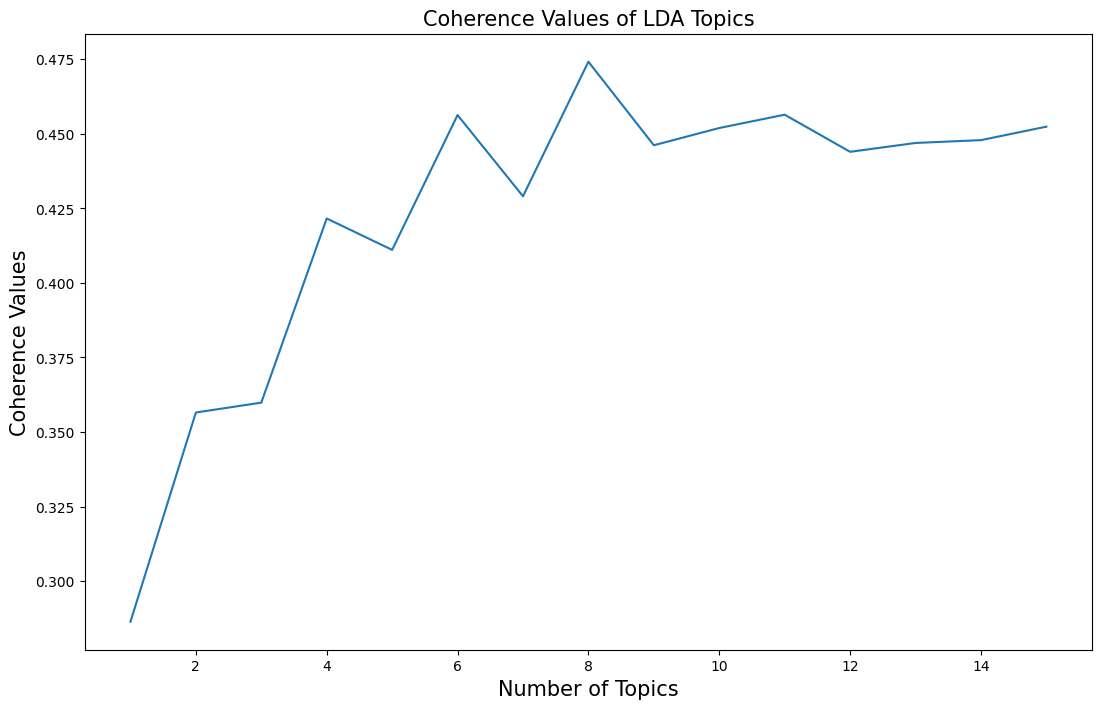

In [ ]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(1,16,1),coherence_values)
plt.xlabel('Number of Topics',fontsize=15)
plt.ylabel('Coherence Values',fontsize=15)
plt.title('Coherence Values of LDA Topics',fontsize=15)
plt.savefig("coherencescores1.svg")

After tuning the various parameters (passes and chuck sizes) in the LDA Model, the Coherence Scores for the the # of Topics were plotted. The number of topic clusters that were extracted from the LDA Model was 8.

### pyLDA Visualization

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.098137 -0.062088       1        1  20.986359
0     -0.131858 -0.029539       2        1  16.931416
3      0.028636  0.070991       3        1  16.882431
4      0.180566 -0.034494       4        1  13.785312
7      0.019415 -0.095023       5        1  12.793461
1      0.058248  0.279259       6        1   7.282227
6     -0.287027  0.011384       7        1   6.343891
2      0.033883 -0.140490       8        1   4.994904, topic_info=        Term          Freq         Total Category  logprob  loglift
27      mile  22540.000000  22540.000000  Default  30.0000  30.0000
199      mpg  14479.000000  14479.000000  Default  29.0000  29.0000
1092   truck   9396.000000   9396.000000  Default  28.0000  28.0000
227     seat  19338.000000  19338.000000  Default  27.0000  27.0000
40    system   9462.000000   9462.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
94       get   1068.933704  21713.442058   Topic8  -4.9475  -0.0145
106    power    840.809619   7810.830291   Topic8  -5.1876   0.7679
79      best    810.805504   6086.574025   Topic8  -5.2239   0.9809
5     bought    801.811175   9527.453602   Topic8  -5.2351   0.5217
27      mile    747.556038  22540.519036   Topic8  -5.3052  -0.4095

[613 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
9262      5  0.994090     achieved
3194      2  0.995334  acknowledge
4722      1  0.610437        acura
4722      6  0.389233        acura
1953      3  0.873827       adjust
...     ...       ...          ...
49        4  0.060110         year
49        5  0.103969         year
49        6  0.031719         year
49        7  0.212833         year
49        8  0.087065         year

[1488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 5, 8, 2, 7, 3])

### Mapping LDA results (topic distributions and topic keywords) back to the original car reviews

In [ ]:
def format_topics_sentences(lda_model,corpus):
    '''Mapping dominant topic, probability of the topic occuring, and the keywords of the original 
    review documents onto a new dataframe'''
    
    '''Returning a list that can be used to make a dataframe'''
    
    topic_list = []
    
    for i,row in enumerate(lda_model[corpus]):     
        row = sorted(row, key = lambda x:x[1],reverse=True)  
        
        for j,(topic_num,prop_topic) in enumerate(row):
            
            if j== 0 :              
                words = lda_model.show_topic(topic_num)            
                topic_keywords = ','.join([word for word,prob in words])             
                topic_list.append([int(topic_num),round(prop_topic,4),topic_keywords])               
    return topic_list

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tmplist = format_topics_sentences(lda_model,bow_corpus)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
document_df = pd.DataFrame(tmplist,columns=['topic_num','topicprob', 'keywords'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_car_df = pd.concat([car_df,document_df],axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Mapping the most representative documents for each topic

In [ ]:
def get_top_cars(new_car_df,topicnum,num_cars):
    return new_car_df[new_car_df.topic_num == topicnum].sort_values(['topicprob'],ascending=False)[:num_cars]

def get_top_cars_filter(new_car_df,topicnum,num_cars,carfilter):
    return new_car_df[(new_car_df.topic_num == topicnum) & (new_car_df.type == carfilter)].sort_values(['topicprob'],ascending=False)[:num_cars]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_car_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                  vehicle  \
0 2017-01-18 07:15:00   Dodge Avenger Sedan SE   
1 2016-11-08 09:39:00   Dodge Avenger Sedan SE   
2 2014-10-09 10:57:00  Dodge Avenger Sedan R/T   
3 2018-08-15 09:57:00   Dodge Avenger Sedan SE   
4 2016-12-19 08:57:00  Dodge Avenger Sedan R/T   

                                              review  rating  year  user_id  \
0  bought dodge avenger brand new shop regular le...     1.0  2014    20686   
1  se model recently purchased car love sporty lo...     4.0  2014      499   
2  traded dodge dart turbo manual avenger pentast...     5.0  2014    27852   
3  bought car sister left auto loan longer needed...     2.0  2012    10419   
4  bought car brand new shop time fixed heater co...     3.0  2012    11484   

                       DESC  text_length  topic_num  topicprob  \
0  4dr Sedan (2.4L 4cyl 4A)           61          0     0.4703   
1  4dr Sedan (2.4L 4cyl 4A)           31          1     0.3792   
2  4dr Sedan (3.6L 6cyl 6A)           63          5     0.6690   
3  4dr Sedan (2.4L 4cyl 4A)          200          3     0.3975   
4  4dr Sedan (3.6L 6cyl 6A)          138          0     0.5574   

                                            keywords  
0  car,problem,dealer,time,issue,back,dealership,...  
1  system,feature,navigation,phone,use,work,radio...  
2   car,drive,like,one,love,bmw,year,sport,look,feel  
3  car,like,seat,door,get,front,rear,wheel,road,side  
4  car,problem,dealer,time,issue,back,dealership,...

In [ ]:
get_top_cars(new_car_df,7,10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                       vehicle  \
10506 2013-05-12 04:03:00        Kia Forte Hatchback SX   
7089  2012-08-26 12:23:00   Hyundai Sonata Hybrid Sedan   
2890  2013-11-02 17:17:00      Ford Fusion Hybrid Sedan   
26946 2013-12-30 02:09:00  Chevrolet Volt Hatchback 4dr   
3114  2013-09-20 10:20:00       Ford C-Max Hybrid Wagon   
7218  2011-06-04 16:58:00   Hyundai Sonata Hybrid Sedan   
26240 2013-10-25 20:35:00     Chevrolet Cruze Sedan Eco   
21326 2016-02-03 19:01:00       Subaru Outback SUV 2.5i   
27687 2016-05-19 09:30:00  Chevrolet Spark EV Hatchback   
33532 2014-07-08 15:20:00     Honda Accord Hybrid Sedan   

                                                  review  rating  year  \
10506  since starting new job entailed considerable c...     4.0  2013   
7089   took delivery new sonata hybrid july happy car...     4.0  2012   
2890   fusion hybrid month mpg learned behavior first...     5.0  2014   
26946  current overall milage mpg climbing expect ove...     5.0  2014   
3114   car month mile live hilly urban area bay area ...     5.0  2013   
7218   mile car taken car couple three hour highway t...     4.0  2011   
26240  month purchased gas cruze eco six speed manual...     5.0  2014   
21326  love car hate fuel mileage mile dropped mpg ci...     3.0  2013   
27687  leased car year ago still love said time regre...     5.0  2015   
33532  got car week ago drove around houston dallas t...     4.0  2014   

       user_id                                              DESC  text_length  \
10506    30823                      4dr Hatchback (2.4L 4cyl 6A)           72   
7089     31548      4dr Sedan (2.4L 4cyl gas/electric hybrid 6A)           67   
2890     28650  SE 4dr Sedan (2.0L 4cyl gas/electric hybrid CVT)           63   
26946    24117                Hatchback (gas/electric hybrid DD)           63   
3114     22048  SE 4dr Wagon (2.0L 4cyl gas/electric hybrid CVT)           64   
7218     24241      4dr Sedan (2.4L 4cyl gas/electric hybrid 6A)           60   
26240    34486                    4dr Sedan (1.4L 4cyl Turbo 6M)           52   
21326     9800                        4dr SUV AWD (2.5L 4cyl 6M)           52   
27687    16263                   2LT 4dr Hatchback (electric DD)           50   
33532    34642     4dr Sedan (2.0L 4cyl gas/electric hybrid CVT)           51   

       topic_num  topicprob                                           keywords  
10506          7     0.9873  mpg,car,mile,gas,mileage,get,highway,driving,d...  
7089           7     0.9869  mpg,car,mile,gas,mileage,get,highway,driving,d...  
2890           7     0.9863  mpg,car,mile,gas,mileage,get,highway,driving,d...  
26946          7     0.9861  mpg,car,mile,gas,mileage,get,highway,driving,d...  
3114           7     0.9861  mpg,car,mile,gas,mileage,get,highway,driving,d...  
7218           7     0.9856  mpg,car,mile,gas,mileage,get,highway,driving,d...  
26240          7     0.9834  mpg,car,mile,gas,mileage,get,highway,driving,d...  
21326          7     0.9830  mpg,car,mile,gas,mileage,get,highway,driving,d...  
27687          7     0.9828  mpg,car,mile,gas,mileage,get,highway,driving,d...  
33532          7     0.9828  mpg,car,mile,gas,mileage,get,highway,driving,d...

## Mapping all the topic distributions back to the original dataframe

In [ ]:
topics = [lda_model[bow_corpus[i]] for i in range(len(car_df))]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def topic_prob_df(topics,num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics:
        res.loc[0,topic_weight[0]] = topic_weight[1]
    return res

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_prob_df = pd.concat([topic_prob_df(topics_document, num_topics=8) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_prob_df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5         6  \
0  0.470267  0.006841  0.137187  0.002021  0.002020  0.002020  0.377625   
1  0.003913  0.379870  0.003915  0.152244  0.357308  0.094917  0.003919   
2  0.001957  0.001957  0.298082  0.001957  0.001958  0.668970  0.023162   
3  0.280943  0.045150  0.015461  0.397608  0.000623  0.005935  0.099455   
4  0.557478  0.000902  0.032640  0.219288  0.000901  0.000901  0.186990   

          7  
0  0.002020  
1  0.003914  
2  0.001957  
3  0.154824  
4  0.000901

In [ ]:
topic_prob_df.rename(columns={0:'topic_1',1:'topic_2',2:'topic_3',3:'topic_4',4:'topic_5',5:'topic_6',
                              6:'topic_7',7:'topic_8'},inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Adding topic_prob dataframe to main dataframe
car_df_final = pd.concat([new_car_df,topic_prob_df],axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
car_df_final

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                   vehicle  \
0     2017-01-18 07:15:00    Dodge Avenger Sedan SE   
1     2016-11-08 09:39:00    Dodge Avenger Sedan SE   
2     2014-10-09 10:57:00   Dodge Avenger Sedan R/T   
3     2018-08-15 09:57:00    Dodge Avenger Sedan SE   
4     2016-12-19 08:57:00   Dodge Avenger Sedan R/T   
...                   ...                       ...   
42834 2016-02-06 03:49:00   Volkswagen Tiguan SUV S   
42835 2016-02-04 05:42:00   Volkswagen Tiguan SUV S   
42836 2016-01-05 00:40:00  Volkswagen Tiguan SUV SE   
42837 2015-11-11 19:49:00   Volkswagen Tiguan SUV S   
42838 2015-10-22 17:04:00   Volkswagen Tiguan SUV S   

                                                  review  rating  year  \
0      bought dodge avenger brand new shop regular le...     1.0  2014   
1      se model recently purchased car love sporty lo...     4.0  2014   
2      traded dodge dart turbo manual avenger pentast...     5.0  2014   
3      bought car sister left auto loan longer needed...     2.0  2012   
4      bought car brand new shop time fixed heater co...     3.0  2012   
...                                                  ...     ...   ...   
42834  owned tiguan year month bought tiguan wanted s...     4.0  2016   
42835  month suv nice suv handle well accelerates wel...     3.0  2016   
42836  smaller dimension driving experience put tigua...     5.0  2016   
42837  tiguan month prior trouble free passat overall...     4.0  2016   
42838  tiguan reasonable get pay average around super...     4.0  2016   

       user_id                          DESC  text_length  topic_num  \
0        20686      4dr Sedan (2.4L 4cyl 4A)           61          0   
1          499      4dr Sedan (2.4L 4cyl 4A)           31          1   
2        27852      4dr Sedan (3.6L 6cyl 6A)           63          5   
3        10419      4dr Sedan (2.4L 4cyl 4A)          200          3   
4        11484      4dr Sedan (3.6L 6cyl 6A)          138          0   
...        ...                           ...          ...        ...   
42834     2090  4dr SUV (2.0L 4cyl Turbo 6A)          172          7   
42835     1661  4dr SUV (2.0L 4cyl Turbo 6A)           77          1   
42836     9042  4dr SUV (2.0L 4cyl Turbo 6A)          183          5   
42837     2043  4dr SUV (2.0L 4cyl Turbo 6A)           92          5   
42838    15269  4dr SUV (2.0L 4cyl Turbo 6A)           65          7   

       topicprob                                           keywords   topic_1  \
0         0.4703  car,problem,dealer,time,issue,back,dealership,...  0.470267   
1         0.3792  system,feature,navigation,phone,use,work,radio...  0.003913   
2         0.6690   car,drive,like,one,love,bmw,year,sport,look,feel  0.001957   
3         0.3975  car,like,seat,door,get,front,rear,wheel,road,side  0.280943   
4         0.5574  car,problem,dealer,time,issue,back,dealership,...  0.557478   
...          ...                                                ...       ...   
42834     0.3962  mpg,car,mile,gas,mileage,get,highway,driving,d...  0.098898   
42835     0.4570  system,feature,navigation,phone,use,work,radio...  0.001627   
42836     0.5009   car,drive,like,one,love,bmw,year,sport,look,feel  0.000681   
42837     0.4475   car,drive,like,one,love,bmw,year,sport,look,feel  0.039433   
42838     0.3655  mpg,car,mile,gas,mileage,get,highway,driving,d...  0.001927   

        topic_2   topic_3   topic_4   topic_5   topic_6   topic_7   topic_8  
0      0.006841  0.137187  0.002021  0.002020  0.002020  0.377625  0.002020  
1      0.379870  0.003915  0.152244  0.357308  0.094917  0.003919  0.003914  
2      0.001957  0.298082  0.001957  0.001958  0.668970  0.023162  0.001957  
3      0.045150  0.015461  0.397608  0.000623  0.005935  0.099455  0.154824  
4      0.000902  0.032640  0.219288  0.000901  0.000901  0.186990  0.000901  
...         ...       ...       ...       ...       ...       ...       ...  
42834  0.000724  0.000724  0.145748  0.087219  0.228705  0.041748  0.396233  
42

## LDA Visualizations Part 2

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

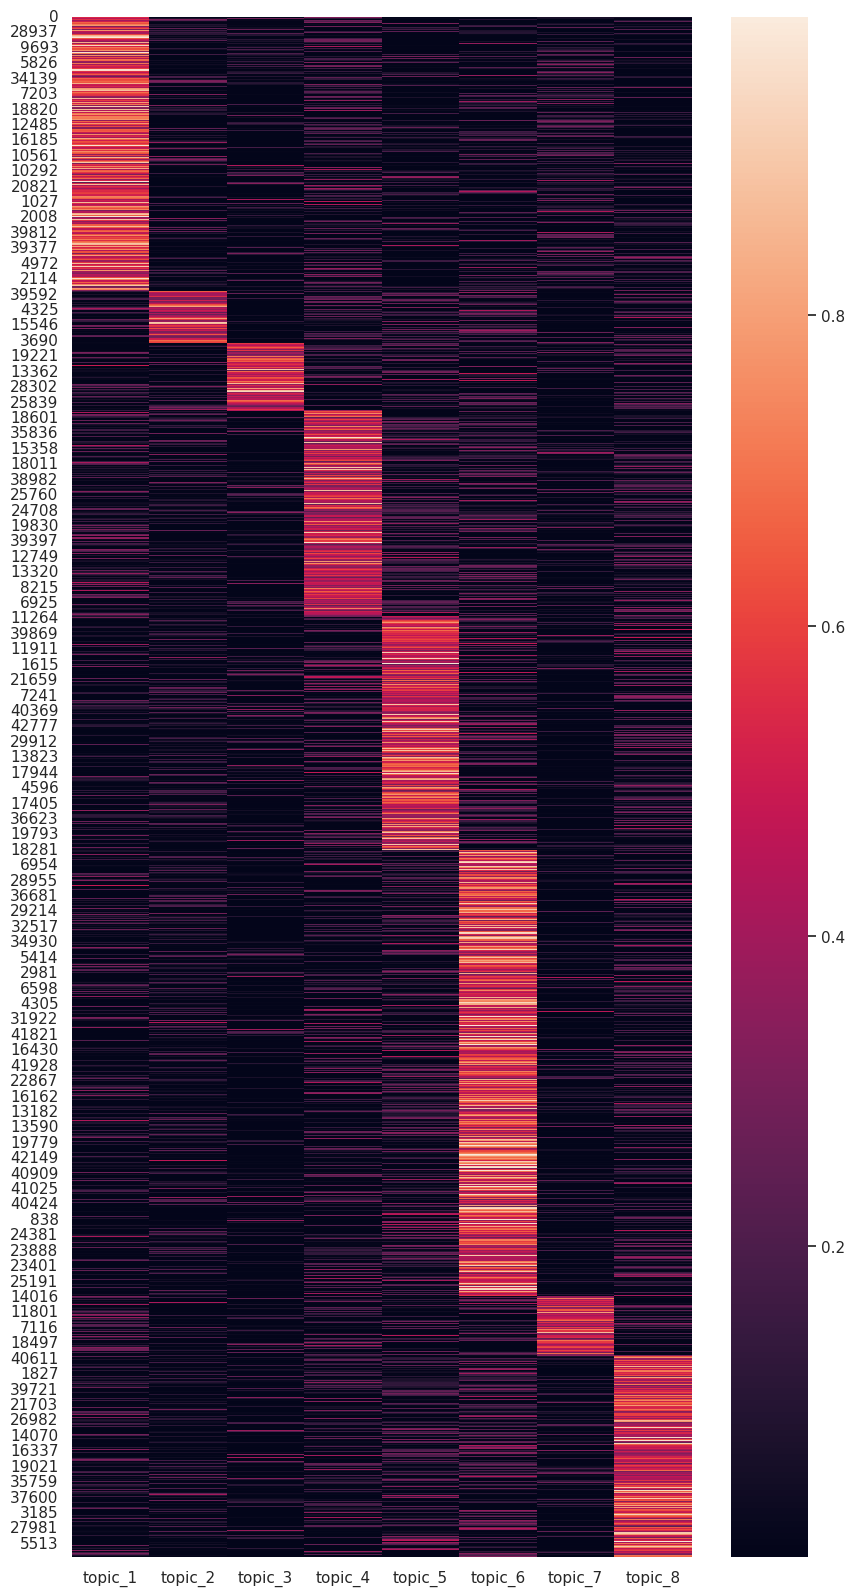

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(topic_prob_df.loc[topic_prob_df.idxmax(axis=1).sort_values().index])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

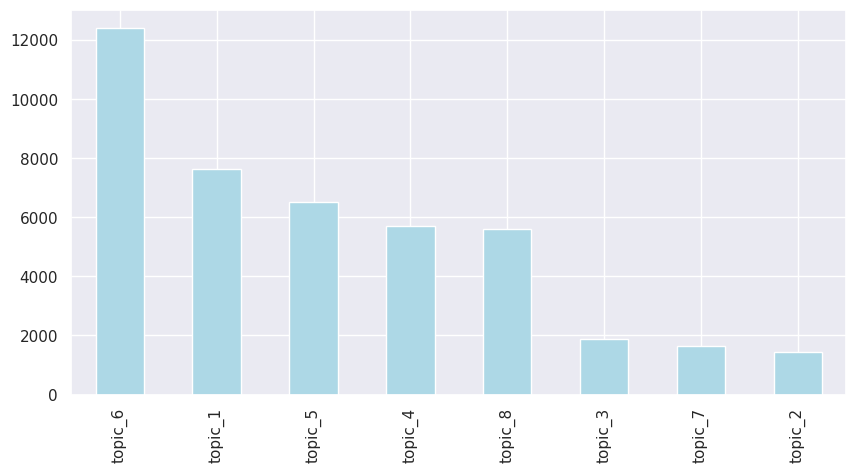

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
topic_prob_df.idxmax(axis=1).value_counts().sort_values(ascending=False).plot.bar(color='lightblue')

In [ ]:
topics = lda_model.show_topics(formatted=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-b973c0d44af5>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


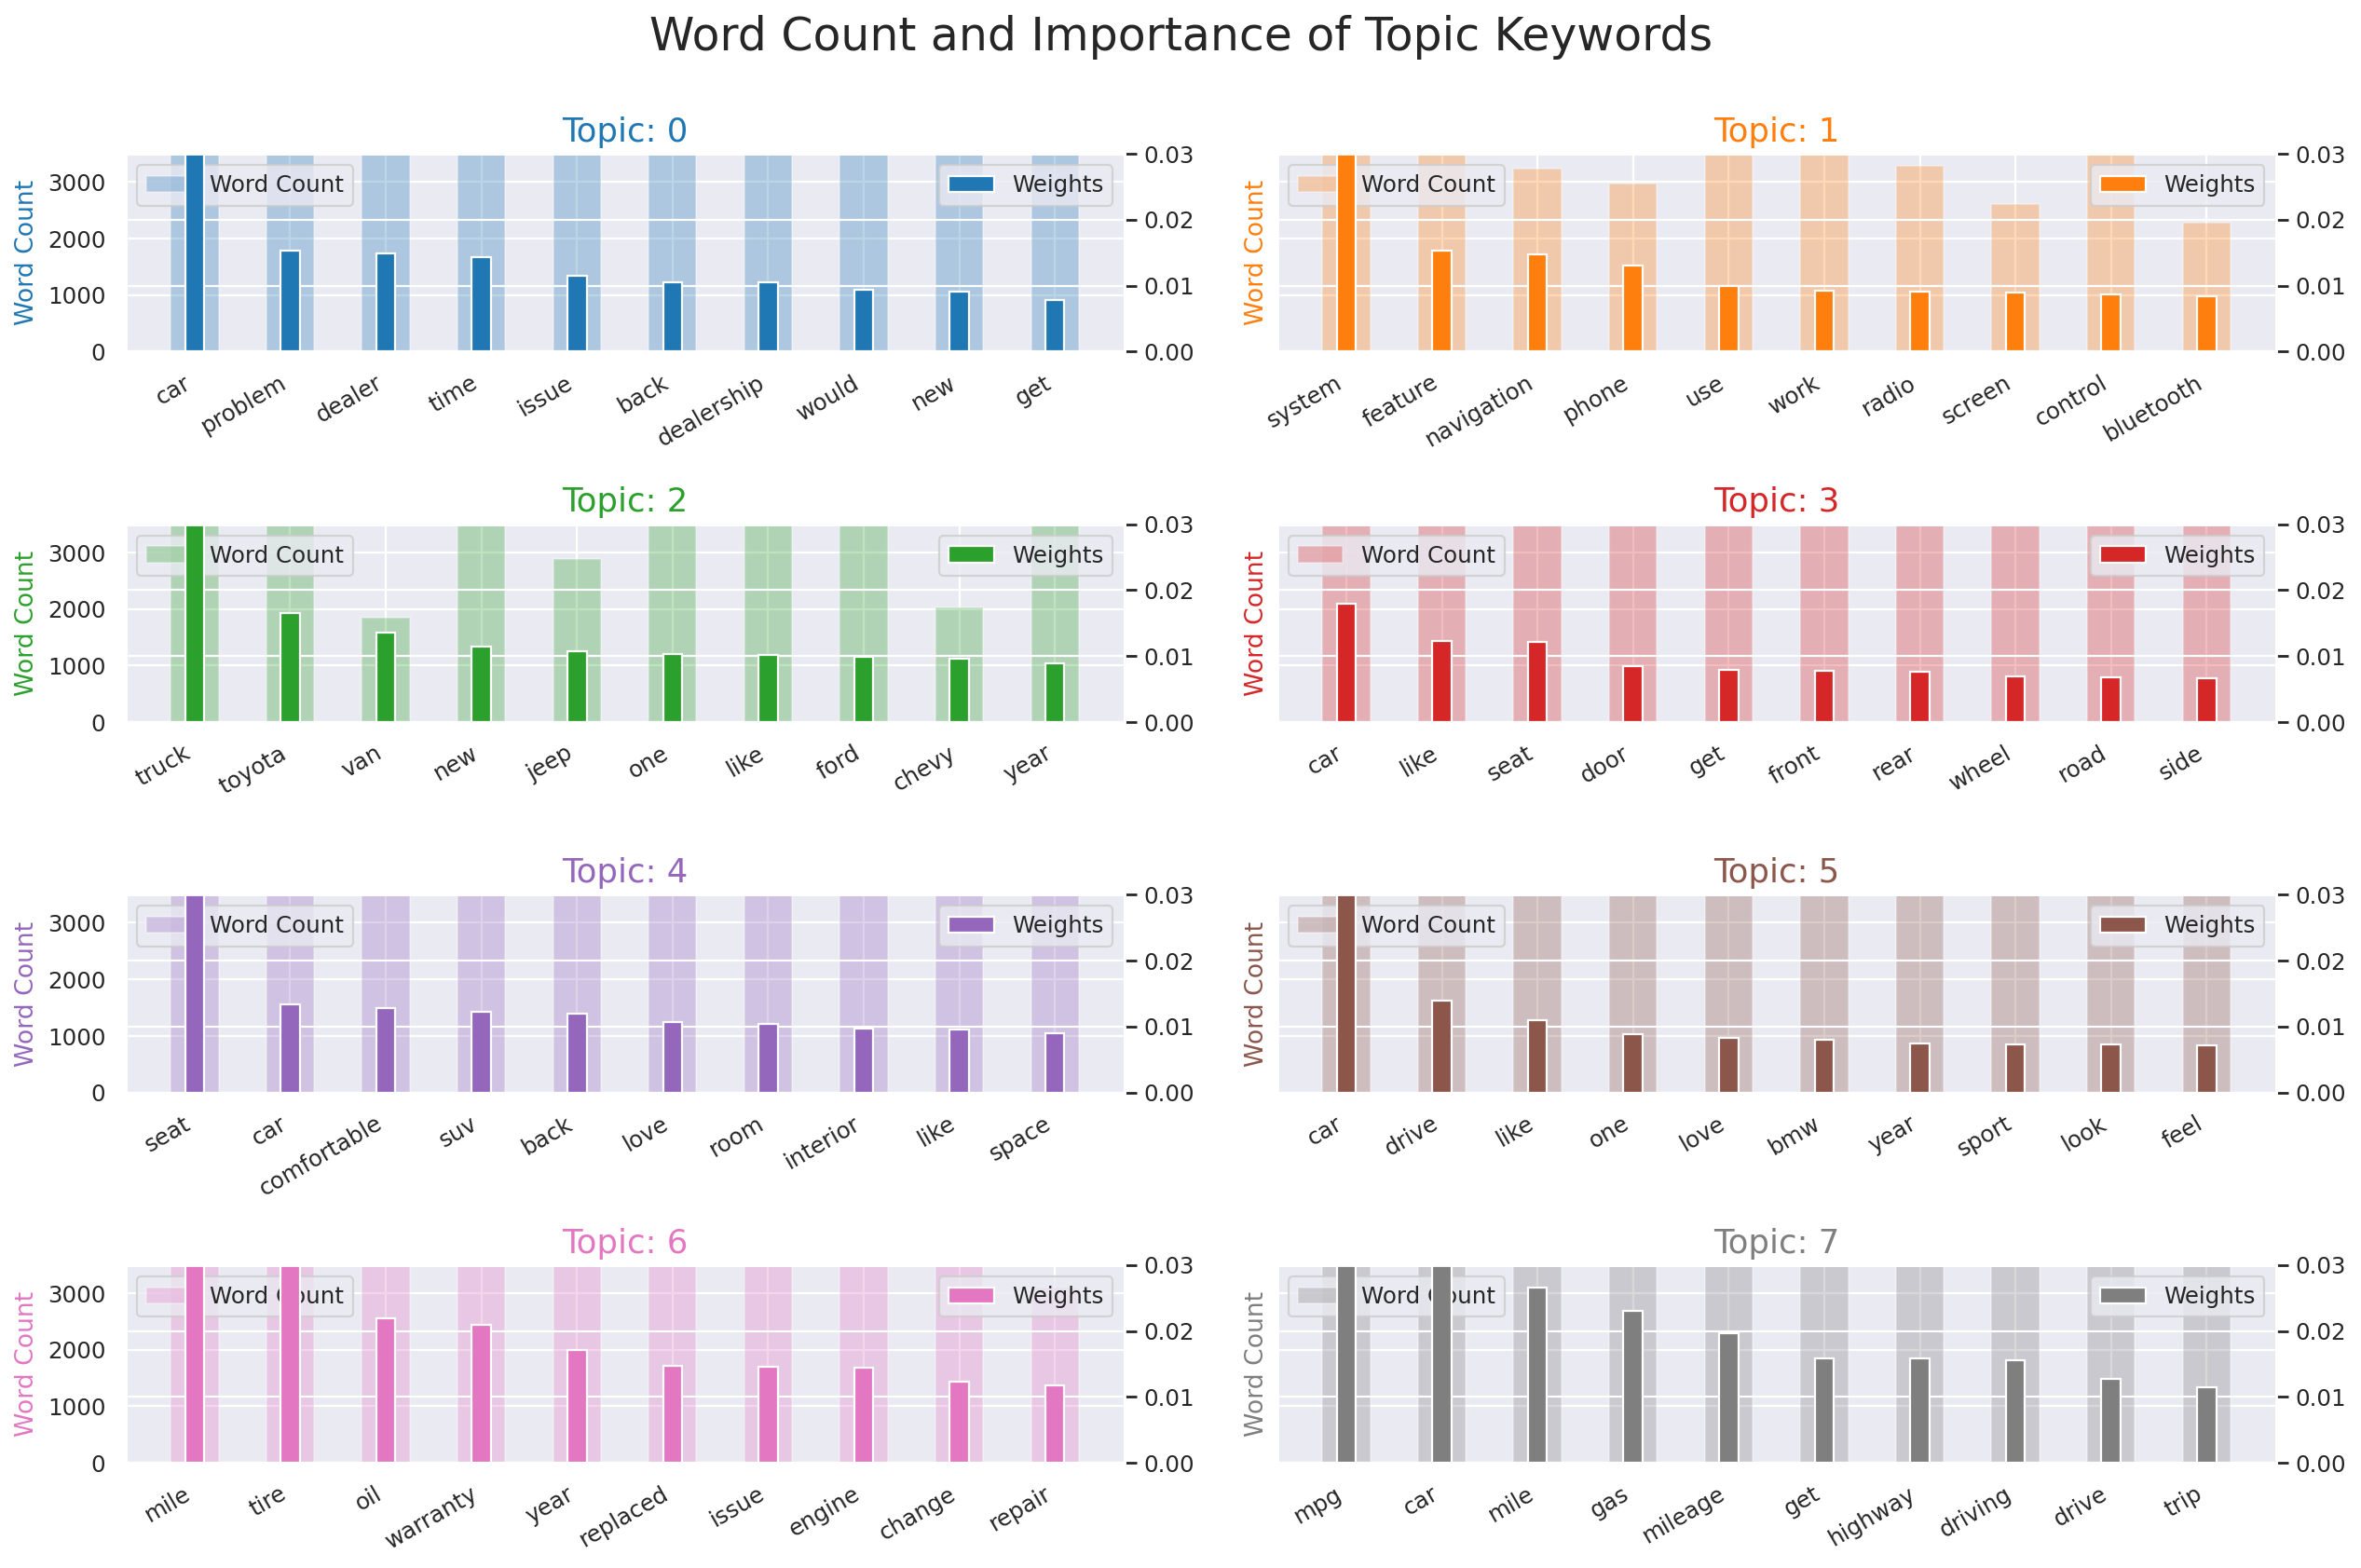

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(4, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [ ]:
car_df_final.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                  vehicle  \
0 2017-01-18 07:15:00   Dodge Avenger Sedan SE   
1 2016-11-08 09:39:00   Dodge Avenger Sedan SE   
2 2014-10-09 10:57:00  Dodge Avenger Sedan R/T   
3 2018-08-15 09:57:00   Dodge Avenger Sedan SE   
4 2016-12-19 08:57:00  Dodge Avenger Sedan R/T   

                                              review  rating  year  user_id  \
0  bought dodge avenger brand new shop regular le...     1.0  2014    20686   
1  se model recently purchased car love sporty lo...     4.0  2014      499   
2  traded dodge dart turbo manual avenger pentast...     5.0  2014    27852   
3  bought car sister left auto loan longer needed...     2.0  2012    10419   
4  bought car brand new shop time fixed heater co...     3.0  2012    11484   

                       DESC  text_length  topic_num  topicprob  \
0  4dr Sedan (2.4L 4cyl 4A)           61          0     0.4703   
1  4dr Sedan (2.4L 4cyl 4A)           31          1     0.3792   
2  4dr Sedan (3.6L 6cyl 6A)           63          5     0.6690   
3  4dr Sedan (2.4L 4cyl 4A)          200          3     0.3975   
4  4dr Sedan (3.6L 6cyl 6A)          138          0     0.5574   

                                            keywords   topic_1   topic_2  \
0  car,problem,dealer,time,issue,back,dealership,...  0.470267  0.006841   
1  system,feature,navigation,phone,use,work,radio...  0.003913  0.379870   
2   car,drive,like,one,love,bmw,year,sport,look,feel  0.001957  0.001957   
3  car,like,seat,door,get,front,rear,wheel,road,side  0.280943  0.045150   
4  car,problem,dealer,time,issue,back,dealership,...  0.557478  0.000902   

    topic_3   topic_4   topic_5   topic_6   topic_7   topic_8  
0  0.137187  0.002021  0.002020  0.002020  0.377625  0.002020  
1  0.003915  0.152244  0.357308  0.094917  0.003919  0.003914  
2  0.298082  0.001957  0.001958  0.668970  0.023162  0.001957  
3  0.015461  0.397608  0.000623  0.005935  0.099455  0.154824  
4  0.032640  0.219288  0.000901  0.000901  0.186990  0.000901

In [ ]:
topics = ['Comfort','Price','Reliability','Technology','Car Handling','Trucks','Fuel Efficiency','Horsepower']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download("stopwords")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


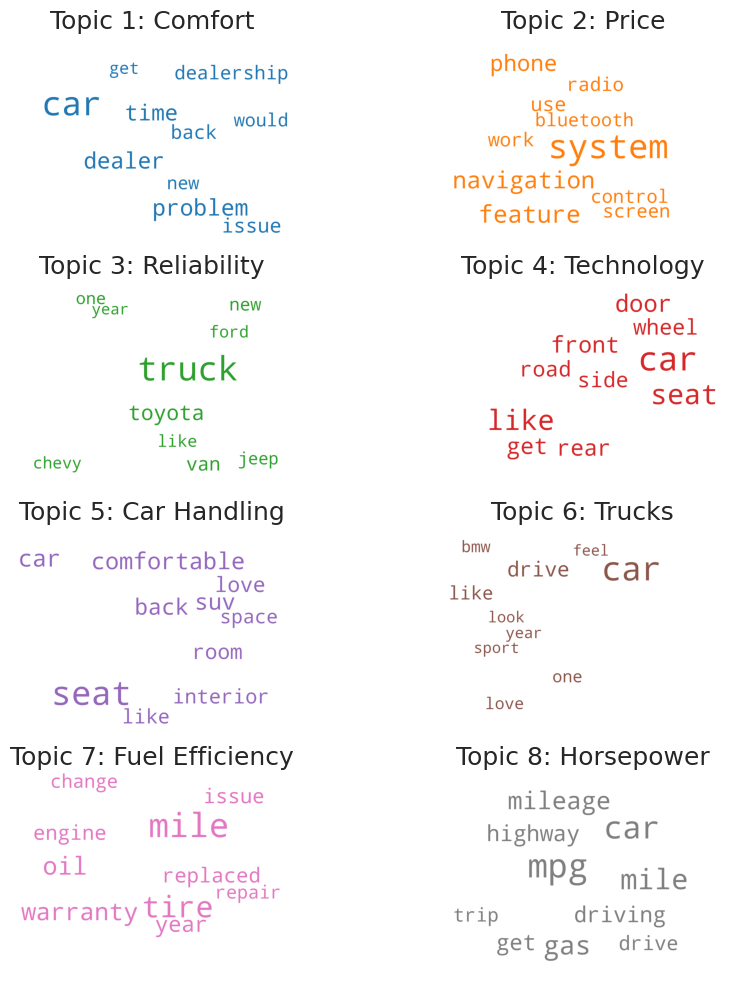

In [ ]:
#  Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from PIL import Image
from os import path
import os

stop = set(stopwords.words('english'));

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# carmask = np.array(Image.open(path.join(d, "car.png")))

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  # mask = carmask,
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics_name = ['Topic 1: Comfort','Topic 2: Price','Topic 3: Reliability','Topic 4: Technology','Topic 5: Car Handling','Topic 6: Trucks','Topic 7: Fuel Efficiency','Topic 8: Horsepower']

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topics_name[i], fontsize=18)
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
fig.savefig('wordcloud1.svg', format='svg', dpi=1200)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.042*"car" + 0.015*"problem" + 0.015*"dealer" + 0.014*"time" + 0.011*"issue" + 0.011*"back" + 0.010*"dealership" + 0.009*"would" + 0.009*"new" + 0.008*"get"
Topic: 1 Word: 0.034*"system" + 0.015*"feature" + 0.015*"navigation" + 0.013*"phone" + 0.010*"use" + 0.009*"work" + 0.009*"radio" + 0.009*"screen" + 0.009*"control" + 0.008*"bluetooth"
Topic: 2 Word: 0.062*"truck" + 0.017*"toyota" + 0.013*"van" + 0.011*"new" + 0.011*"jeep" + 0.010*"one" + 0.010*"like" + 0.010*"ford" + 0.010*"chevy" + 0.009*"year"
Topic: 3 Word: 0.018*"car" + 0.012*"like" + 0.012*"seat" + 0.008*"door" + 0.008*"get" + 0.008*"front" + 0.008*"rear" + 0.007*"wheel" + 0.007*"road" + 0.007*"side"
Topic: 4 Word: 0.032*"seat" + 0.013*"car" + 0.013*"comfortable" + 0.012*"suv" + 0.012*"back" + 0.011*"love" + 0.010*"room" + 0.010*"interior" + 0.009*"like" + 0.009*"space"
Topic: 5 Word: 0.056*"car" + 0.014*"drive" + 0.011*"like" + 0.009*"one" + 0.008*"love" + 0.008*"bmw" + 0.007*"year" + 0.007*"sport" + 0.007*"l

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Using our LDA model to recommend cars on unseen documents.

In [ ]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download("wordnet")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
unseen_document = 'fuel efficient '

bow_vector = dictionary.doc2bow(preprocess(unseen_document))
sorted(lda_model[bow_vector], key=lambda x:x[1],reverse=True)[0][0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7

In [ ]:
get_top_cars(car_df_final,0,10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                   vehicle  \
731   2018-06-02 04:19:00        FIAT 500X SUV Easy   
18675 2013-10-09 09:09:00     Nissan Sentra Sedan S   
2154  2014-01-05 16:58:00  Ford Focus Hatchback SEL   
40253 2015-05-05 12:32:00     Toyota Camry Sedan LE   
1741  2011-07-20 18:05:00     Ford Fiesta Sedan SEL   
9593  2015-05-08 17:37:00   Jeep Grand Cherokee SUV   
1610  2013-05-01 12:02:00  Ford Fiesta Hatchback SE   
38503 2016-06-23 11:21:00   Toyota RAV4 SUV Limited   
5424  2014-11-30 19:38:00   Hyundai Azera Sedan 4dr   
977   2016-03-17 10:25:00    FIAT 500 Abarth Abarth   

                                                  review  rating  year  \
731    bought car december fiat month later nightmare...     1.0  2016   
18675  known stalling issue corporation trouble solvi...     4.0  2013   
2154   terrified drive thing much like review shudder...     3.0  2012   
40253  leased toyota camry august two month later tak...     2.0  2014   
1741   car mile engine blew called ford towed dealer ...     2.0  2011   
9593   month ownership transmission completely failed...     2.0  2014   
1610   bought ford fiesta jan mile day brought home b...     2.0  2012   
38503  purchase car check see company stand behind pr...     1.0  2016   
5424   everything everyone else writes correct compla...     5.0  2012   
977    purchased car dealer within mile home within o...     1.0  2012   

       user_id                                DESC  text_length  topic_num  \
731       7606              4dr SUV (2.4L 4cyl 9A)           72          0   
18675    32202           4dr Sedan (1.8L 4cyl CVT)           67          0   
2154     34705       4dr Hatchback (2.0L 4cyl 6AM)           64          0   
40253    26601            4dr Sedan (2.5L 4cyl 6A)           60          0   
1741     34271            4dr Sedan (1.6L 4cyl 5M)           57          0   
9593     32052     Overland 4dr SUV (3.6L 6cyl 8A)           54          0   
1610     32352        4dr Hatchback (1.6L 4cyl 5M)           56          0   
38503     3985              4dr SUV (2.5L 4cyl 6A)           54          0   
5424     24430                Sedan (3.3L 6cyl 6A)           53          0   
977      18890  2dr Hatchback (1.4L 4cyl Turbo 5M)           52          0   

       topicprob                                           keywords   topic_1  \
731       0.9878  car,problem,dealer,time,issue,back,dealership,...  0.987828   
18675     0.9869  car,problem,dealer,time,issue,back,dealership,...  0.986897   
2154      0.9865  car,problem,dealer,time,issue,back,dealership,...  0.986511   
40253     0.9854  car,problem,dealer,time,issue,back,dealership,...  0.985389   
1741      0.9846  car,problem,dealer,time,issue,back,dealership,...  0.984596   
9593      0.9841  car,problem,dealer,time,issue,back,dealership,...  0.984065   
1610      0.9841  car,problem,dealer,time,issue,back,dealership,...  0.984074   
38503     0.9838  car,problem,dealer,time,issue,back,dealership,...  0.983769   
5424      0.9835  car,problem,dealer,time,issue,back,dealership,...  0.983456   
977       0.9835  car,problem,dealer,time,issue,back,dealership,...  0.983466   

        topic_2   topic_3   topic_4   topic_5   topic_6   topic_7   topic_8  
731    0.001738  0.001738  0.001739  0.001738  0.001739  0.001742  0.001738  
18675  0.001871  0.001872  0.001872  0.001872  0.001872  0.001872  0.001872  
2154   0.001926  0.001926  0.001927  0.001926  0.001927  0.001928  0.001929  
40253  0.002087  0.002088  0.002087  0.002086  0.002088  0.002088  0.002088  
1741   0.002205  0.002202  0.002200  0.002199  0.002198  0.002200  0.002200  
9593   0.002281  0.002276  0.002276  0.002276  0.002276  0.002276  0.002276  
1610   0.002274  0.002276  0.002276  0.002274  0.002275  0.002275  0.002276  
38503  0.002318  0.002322  0.002317  0.002318  0.002319  0.002319  0.002317  
5424   0.002364  0.002363  0.002364  0.002363  0.002365  0.002362  0.002364  
977    0.002361  0.002362  0.002361  0.002361  0.002362  0.002

### TSNE Visualizations 

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
from bokeh.models import ColumnDataSource, LabelSet
from sklearn.manifold import TSNE
output_notebook()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using Seaborn Scatter plot

In [ ]:
hm = np.array([[y for (x,y) in lda_model[bow_corpus[i]]] for i in range(len(bow_corpus))])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(hm)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42839 samples in 0.048s...
[t-SNE] Computed neighbors for 42839 samples in 6.606s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42839
[t-SNE] Computed conditional probabilities for sample 2000 / 42839
[t-SNE] Computed conditional probabilities for sample 3000 / 42839
[t-SNE] Computed conditional probabilities for sample 4000 / 42839
[t-SNE] Computed conditional probabilities for sample 5000 / 42839
[t-SNE] Computed conditional probabilities for sample 6000 / 42839
[t-SNE] Computed conditional probabilities for sample 7000 / 42839
[t-SNE] Computed conditional probabilities for sample 8000 / 42839
[t-SNE] Computed conditional probabilities for sample 9000 / 42839
[t-SNE] Computed conditional probabilities for sample 10000 / 42839
[t-SNE] Computed conditional probabilities for sample 11000 / 42839
[t-SNE] Computed conditional probabilities for sample 12000 / 42839
[t-SNE] Computed conditional probabilities for sam

In [ ]:
tsne_lda_df = pd.DataFrame(tsne_lda, columns =['x','y'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tsne_lda_df['topics'] = hm.argmax(axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


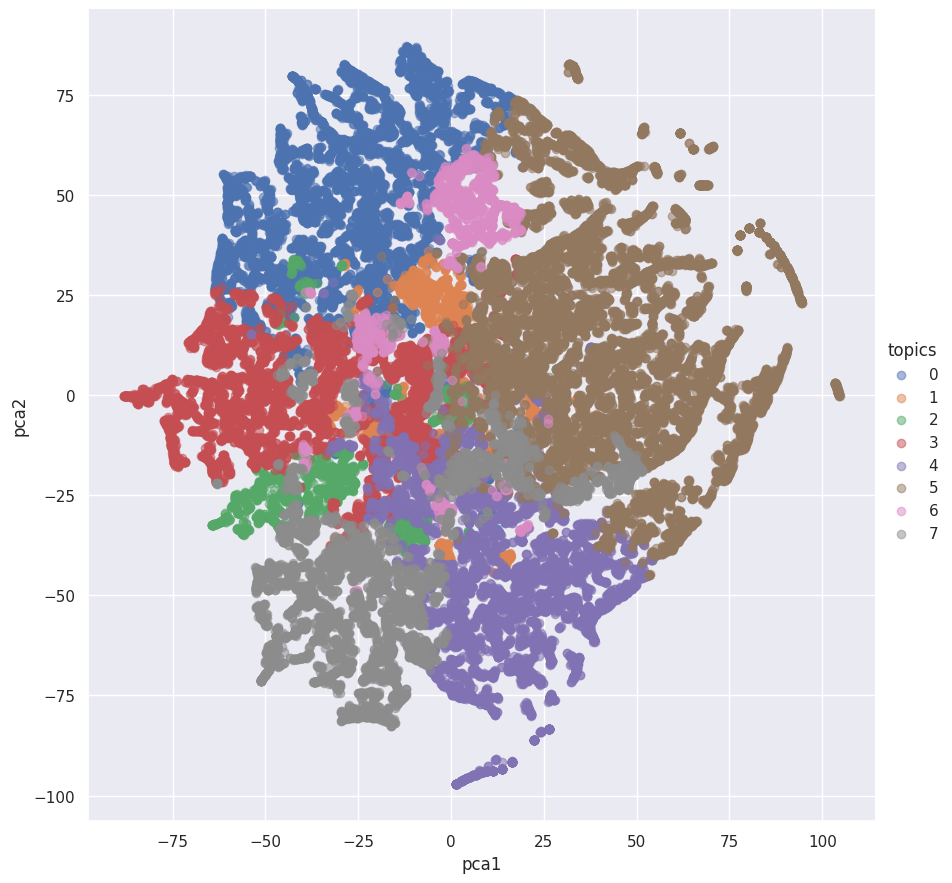

In [ ]:
sns.lmplot(x='x',y='y',data = tsne_lda_df, hue ='topics',fit_reg=False,legend=True,height=9, scatter_kws={'alpha':0.5})
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.savefig("TSNE.svg")

Using Bokeh

In [ ]:
tsne = TSNE(random_state=2017, perplexity=30)
tsne_embedding = tsne.fit_transform(hm)
tsne_embedding = pd.DataFrame(tsne_embedding, columns=['x','y'])
tsne_embedding['hue'] = hm.argmax(axis=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tsne_embedding.hue.unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1, 5, 3, 6, 2, 7, 4])

In [ ]:
colors = [all_palettes['Set1'][8][i] for i in tsne_embedding.hue]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
source = ColumnDataSource(
        data=dict(
            x = tsne_embedding.x,
            y = tsne_embedding.y,
            colors = [all_palettes['Set1'][9][i] for i in tsne_embedding.hue],
            alpha = [0.9] * tsne_embedding.shape[0],
            size = [7] * tsne_embedding.shape[0],
            label= ['Topic 1','Topic 2','Topic 3', 'Topic 4','Topic 5','Topic 6' , 'Topic 7', 'Topic 8']
        )
    )
tools_tsne = ['pan', 'wheel_zoom', 'reset']
plot_tsne = figure(plot_width=700, plot_height=700, tools=tools_tsne, title='Cars')
plot_tsne.circle('x', 'y', size='size', fill_color='colors', legend='label',  
                 alpha='alpha', line_alpha=0, line_width=0.01, source=source, name="df")






/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GlyphRenderer(id='1033', ...)

In [ ]:
layout = column(plot_tsne)
show(layout)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 'Recommending System' based on Text  #1

In [ ]:
unseen_document = 'a big car that has a lot of space'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
topic_num = sorted(lda_model[bow_vector], key=lambda x:x[1],reverse=True)[0][0]
print(topic_num)

4


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_num

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4

## Adding car types to the dataframe

In [ ]:
car_df_final.loc[(car_df_final.vehicle.str.contains('SUV'),'type')] = 'suv'
car_df_final.loc[(car_df_final.vehicle.str.contains('Convertible'),'type')] = 'convertible'
car_df_final.loc[(car_df_final.vehicle.str.contains('Sedan'),'type')] = 'sedan';
car_df_final.loc[(car_df_final.vehicle.str.contains('Hatchback'),'type')] = 'hatchback';
car_df_final.loc[(car_df_final.vehicle.str.contains('SportWagen'),'type')] = 'hatchback';
car_df_final.loc[(car_df_final.vehicle.str.contains('Wagon'),'type')] = 'hatchback';
car_df_final.loc[(car_df_final.vehicle.str.contains('Van'),'type')] = 'van'
car_df_final.loc[(car_df_final.vehicle.str.contains('Minivan'),'type')] = 'van'
car_df_final.loc[(car_df_final.vehicle.str.contains('Coupe'),'type')] = 'coupe'
car_df_final.loc[(car_df_final.vehicle.str.contains('GMC'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Honda Ridgeline'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Chevrolet Silverado'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Toyota Tacoma'),'type')] = 'truck' 
car_df_final.loc[(car_df_final.vehicle.str.contains('Toyota Tundra'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Ford F-150'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains(' F-450'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains(' Ford F-250'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Ford F-350'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Ford Ranger'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Nissan Titan'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Nissan Frontier '),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Ram'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Suzuki Equator'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Chevrolet Avalanche'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Chevrolet Colorado'),'type')] = 'truck'
car_df_final.loc[(car_df_final.vehicle.str.contains('Chevrolet Black'),'type')] = 'truck'

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
list(get_top_cars_filter(car_df_final,topic_num,10,'suv').vehicle)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Subaru Forester SUV 2.5i',
 'Toyota RAV4 SUV XLE',
 'Buick Enclave SUV Leather',
 'Honda Pilot SUV EX-L',
 'Subaru Crosstrek SUV 2.0i',
 'Subaru Outback SUV 3.6R',
 'Mazda CX-5 SUV Touring',
 'Kia Sorento SUV LX',
 'Kia Sorento SUV EX',
 'Kia Sportage SUV EX']

In [ ]:
car_df_final.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                  vehicle  \
0 2017-01-18 07:15:00   Dodge Avenger Sedan SE   
1 2016-11-08 09:39:00   Dodge Avenger Sedan SE   
2 2014-10-09 10:57:00  Dodge Avenger Sedan R/T   
3 2018-08-15 09:57:00   Dodge Avenger Sedan SE   
4 2016-12-19 08:57:00  Dodge Avenger Sedan R/T   

                                              review  rating  year  user_id  \
0  bought dodge avenger brand new shop regular le...     1.0  2014    20686   
1  se model recently purchased car love sporty lo...     4.0  2014      499   
2  traded dodge dart turbo manual avenger pentast...     5.0  2014    27852   
3  bought car sister left auto loan longer needed...     2.0  2012    10419   
4  bought car brand new shop time fixed heater co...     3.0  2012    11484   

                       DESC  text_length  topic_num  topicprob  \
0  4dr Sedan (2.4L 4cyl 4A)           61          0     0.4703   
1  4dr Sedan (2.4L 4cyl 4A)           31          1     0.3792   
2  4dr Sedan (3.6L 6cyl 6A)           63          5     0.6690   
3  4dr Sedan (2.4L 4cyl 4A)          200          3     0.3975   
4  4dr Sedan (3.6L 6cyl 6A)          138          0     0.5574   

                                            keywords   topic_1   topic_2  \
0  car,problem,dealer,time,issue,back,dealership,...  0.470267  0.006841   
1  system,feature,navigation,phone,use,work,radio...  0.003913  0.379870   
2   car,drive,like,one,love,bmw,year,sport,look,feel  0.001957  0.001957   
3  car,like,seat,door,get,front,rear,wheel,road,side  0.280943  0.045150   
4  car,problem,dealer,time,issue,back,dealership,...  0.557478  0.000902   

    topic_3   topic_4   topic_5   topic_6   topic_7   topic_8   type  
0  0.137187  0.002021  0.002020  0.002020  0.377625  0.002020  sedan  
1  0.003915  0.152244  0.357308  0.094917  0.003919  0.003914  sedan  
2  0.298082  0.001957  0.001958  0.668970  0.023162  0.001957  sedan  
3  0.015461  0.397608  0.000623  0.005935  0.099455  0.154824  sedan  
4  0.032640  0.219288  0.000901  0.000901  0.186990  0.000901  sedan

### Recommending based given a car type

In [ ]:
car_df_final[car_df_final.vehicle == '2017 Acura RDX SUV 4dr SUV (3.5L 6cyl 6A)']['topic_num']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], Name: topic_num, dtype: int64)

In [ ]:
get_top_cars_filter(car_df_final,0,10,'suv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review_Date                     vehicle  \
731   2018-06-02 04:19:00          FIAT 500X SUV Easy   
9593  2015-05-08 17:37:00     Jeep Grand Cherokee SUV   
38503 2016-06-23 11:21:00     Toyota RAV4 SUV Limited   
18271 2013-08-17 09:15:00    Nissan Pathfinder SUV SL   
39069 2017-05-29 15:27:00  Toyota 4Runner SUV Limited   
3772  2012-07-12 14:49:00         Ford Escape SUV XLS   
39633 2015-11-11 06:47:00   Toyota Highlander SUV XLE   
18206 2014-08-27 10:48:00     Nissan Pathfinder SUV S   
9131  2018-08-07 15:25:00      Jeep Compass SUV Sport   
34466 2014-03-26 16:20:00         Honda CR-V SUV EX-L   

                                                  review  rating  year  \
731    bought car december fiat month later nightmare...     1.0  2016   
9593   month ownership transmission completely failed...     2.0  2014   
38503  purchase car check see company stand behind pr...     1.0  2016   
18271  purchased april car dealership time repair day...     3.0  2013   
39069  owning month paint chipping paint chip even wa...     4.0  2016   
3772   got car back march two week later broke middle...     2.0  2012   
39633  believe spent new car additional warranty prom...     2.0  2015   
18206  others shudder low speedbut consistenly never ...     4.0  2014   
9131   got car end may beginning august first radio s...     1.0  2018   
34466  battery charge honda cannot fix problem bought...     2.0  2012   

       user_id                             DESC  text_length  topic_num  \
731       7606           4dr SUV (2.4L 4cyl 9A)           72          0   
9593     32052  Overland 4dr SUV (3.6L 6cyl 8A)           54          0   
38503     3985           4dr SUV (2.5L 4cyl 6A)           54          0   
18271    24525          4dr SUV (3.5L 6cyl CVT)           47          0   
39069      527       4dr SUV 4WD (4.0L 6cyl 5A)           39          0   
3772     34425       4dr SUV AWD (2.5L 4cyl 6A)           38          0   
39633    11123       4dr SUV AWD (3.5L 6cyl 6A)           36          0   
18206    36171      4dr SUV 4WD (3.5L 6cyl CVT)           59          0   
9131     17764           4dr SUV (2.4L 4cyl 6M)           32          0   
34466    24340           4dr SUV (2.4L 4cyl 5A)           32          0   

       topicprob                                           keywords   topic_1  \
731       0.9878  car,problem,dealer,time,issue,back,dealership,...  0.987828   
9593      0.9841  car,problem,dealer,time,issue,back,dealership,...  0.984065   
38503     0.9838  car,problem,dealer,time,issue,back,dealership,...  0.983769   
18271     0.9805  car,problem,dealer,time,issue,back,dealership,...  0.980536   
39069     0.9781  car,problem,dealer,time,issue,back,dealership,...  0.978096   
3772      0.9775  car,problem,dealer,time,issue,back,dealership,...  0.977513   
39633     0.9752  car,problem,dealer,time,issue,back,dealership,...  0.974503   
18206     0.9735  car,problem,dealer,time,issue,back,dealership,...  0.973023   
9131      0.9734  car,problem,dealer,time,issue,back,dealership,...  0.973444   
34466     0.9734  car,problem,dealer,time,issue,back,dealership,...  0.973442   

        topic_2   topic_3   topic_4   topic_5   topic_6   topic_7   topic_8  \
731    0.001738  0.001738  0.001739  0.001738  0.001739  0.001742  0.001738   
9593   0.002281  0.002276  0.002276  0.002276  0.002276  0.002276  0.002276   
38503  0.002318  0.002322  0.002317  0.002318  0.002319  0.002319  0.002317   
18271  0.002778  0.002780  0.002780  0.002780  0.002781  0.002783  0.002781   
39069  0.003127  0.003130  0.003131  0.003128  0.003130  0.003129  0.003129   
3772   0.003210  0.003216  0.003214  0.003213  0.003213  0.003211  0.003210   
39633  0.003386  0.003383  0.003385  0.003383  0.003383  0.005196  0.003382   
18206  0.002317  0.002316  0.002317  0.002316  0.002316  0.013075  0.002320   
9131   0.003799  0.003791  0.003794  0.003791  0.003794  0.003795  0.003792   
34466  0.003793  0.003792  0.003792  0.003794  0.003796  0.0037

In [ ]:
#given a word in text

unseen_document = 'I need a sedan that has a lot of space'
tmp2 = preprocess(unseen_document)
automobile_types =['truck','suv','convertible','sedan','hatchback','van','coupe']
word_tmp = []
for word in tmp2:
    if word in automobile_types:
        word_tmp.append(word)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Writing a function to determine which function to use based on the input user text:
if len(word_tmp) == 0:
    new = get_top_cars(car_df_final,topic_num,10).vehicle.values
else:   
    new = get_top_cars_filter(car_df_final,topic_num,10,word_tmp[0]).vehicle.values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
